<a href="https://colab.research.google.com/github/GoriyashKashyap/RandomForest_Project/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**  Predicting Student Stress from Multifactorial Bio-Signals
The objective of this project is to develop a predictive model to analyze and quantify the relationship between a comprehensive set of psychological, physiological, social, environmental, and academic factors and a student's overall stress level.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**Import Dataset**

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rxnach/student-stress-factors-a-comprehensive-analysis")
print(f"Dataset downloaded to: {path}")

csv_file_name = 'StressLevelDataset.csv'
csv_file_path = os.path.join(path, csv_file_name)

100%|██████████| 11.7k/11.7k [00:00<00:00, 14.2MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/versions/1


In [3]:
df = pd.read_csv(csv_file_path)

display(df.head())

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


**EDA** :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


**Check For missing Values**

In [7]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


**Check For Duplicates**

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level


In [9]:
df.shape

(1100, 21)

**Correlation Plot**

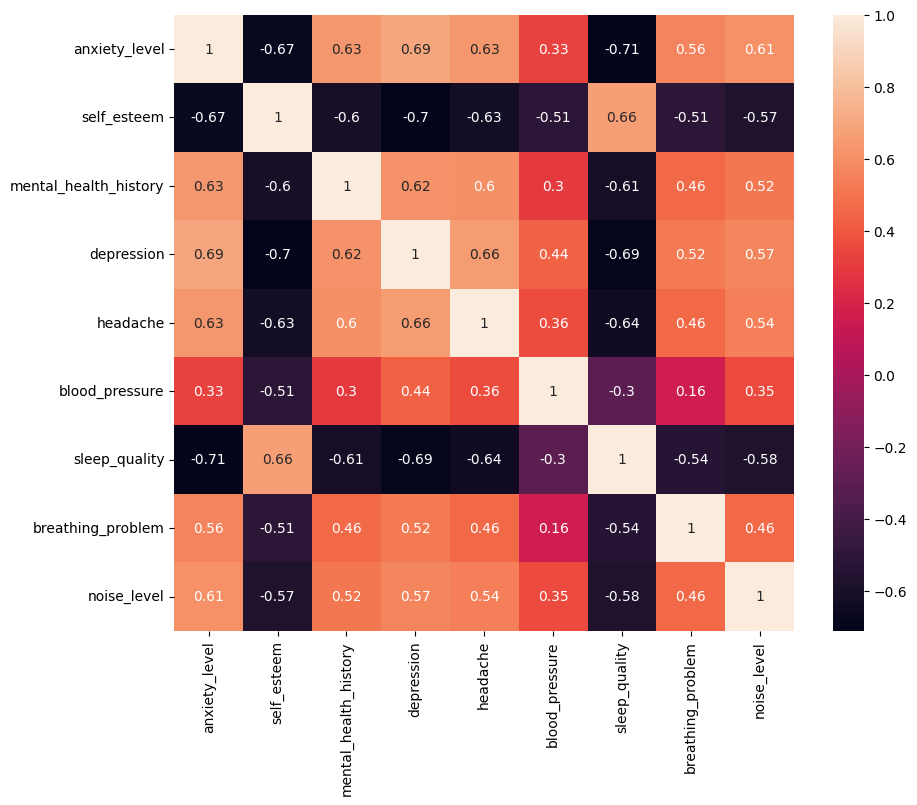

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

**Outlier Checks**

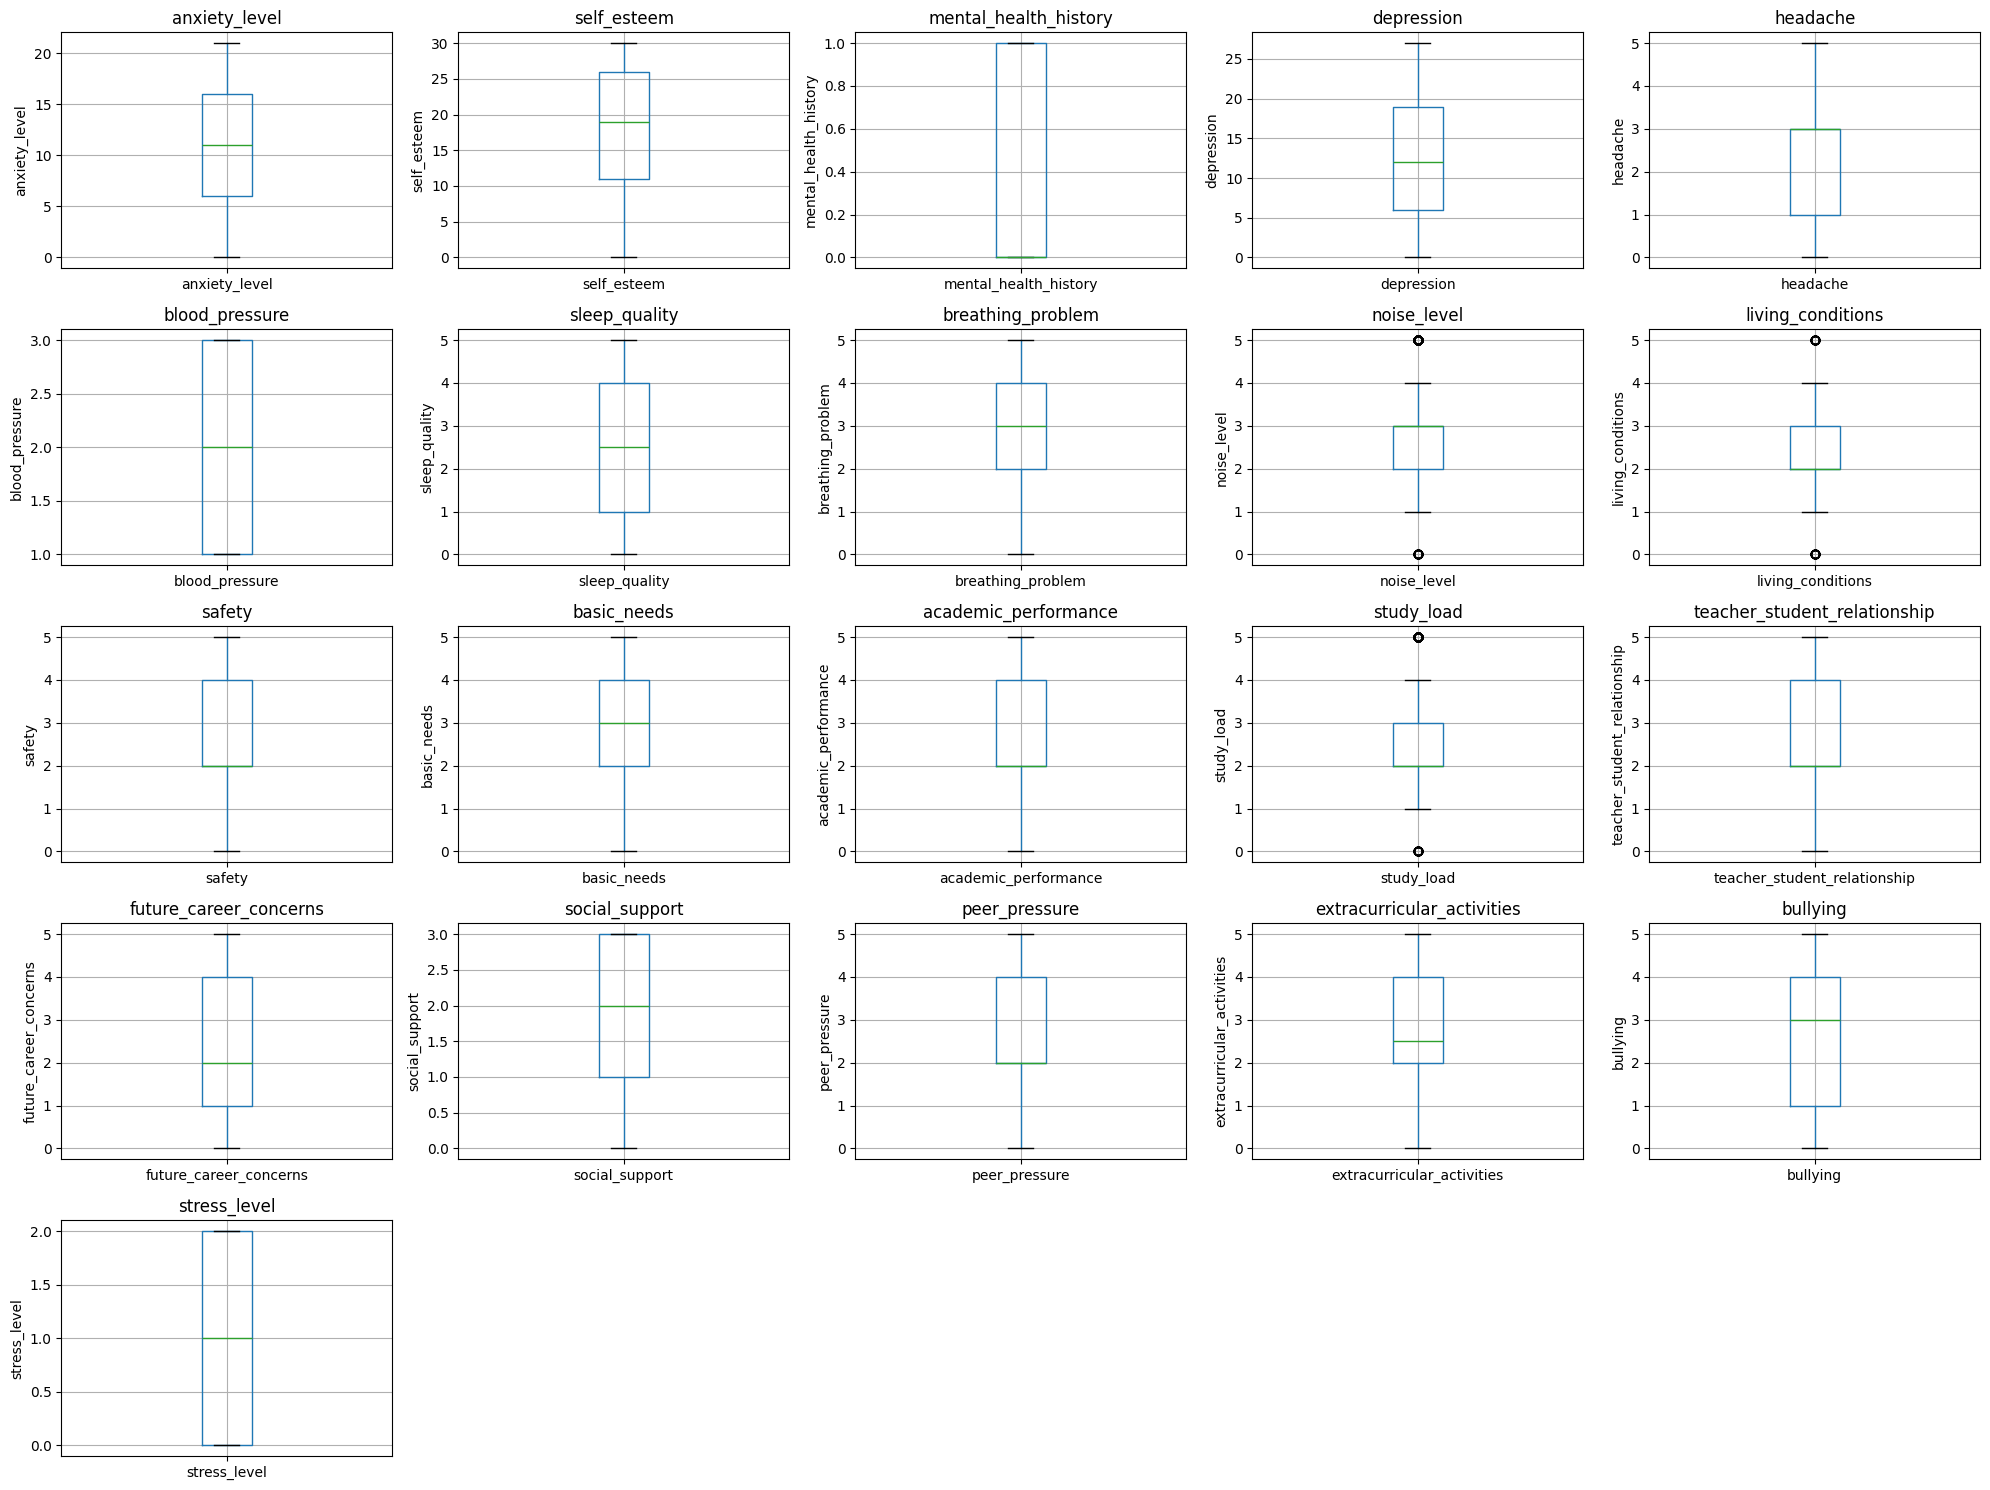

In [14]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [15]:
def remove_outlier(col) :
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [16]:
for column in df.columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])

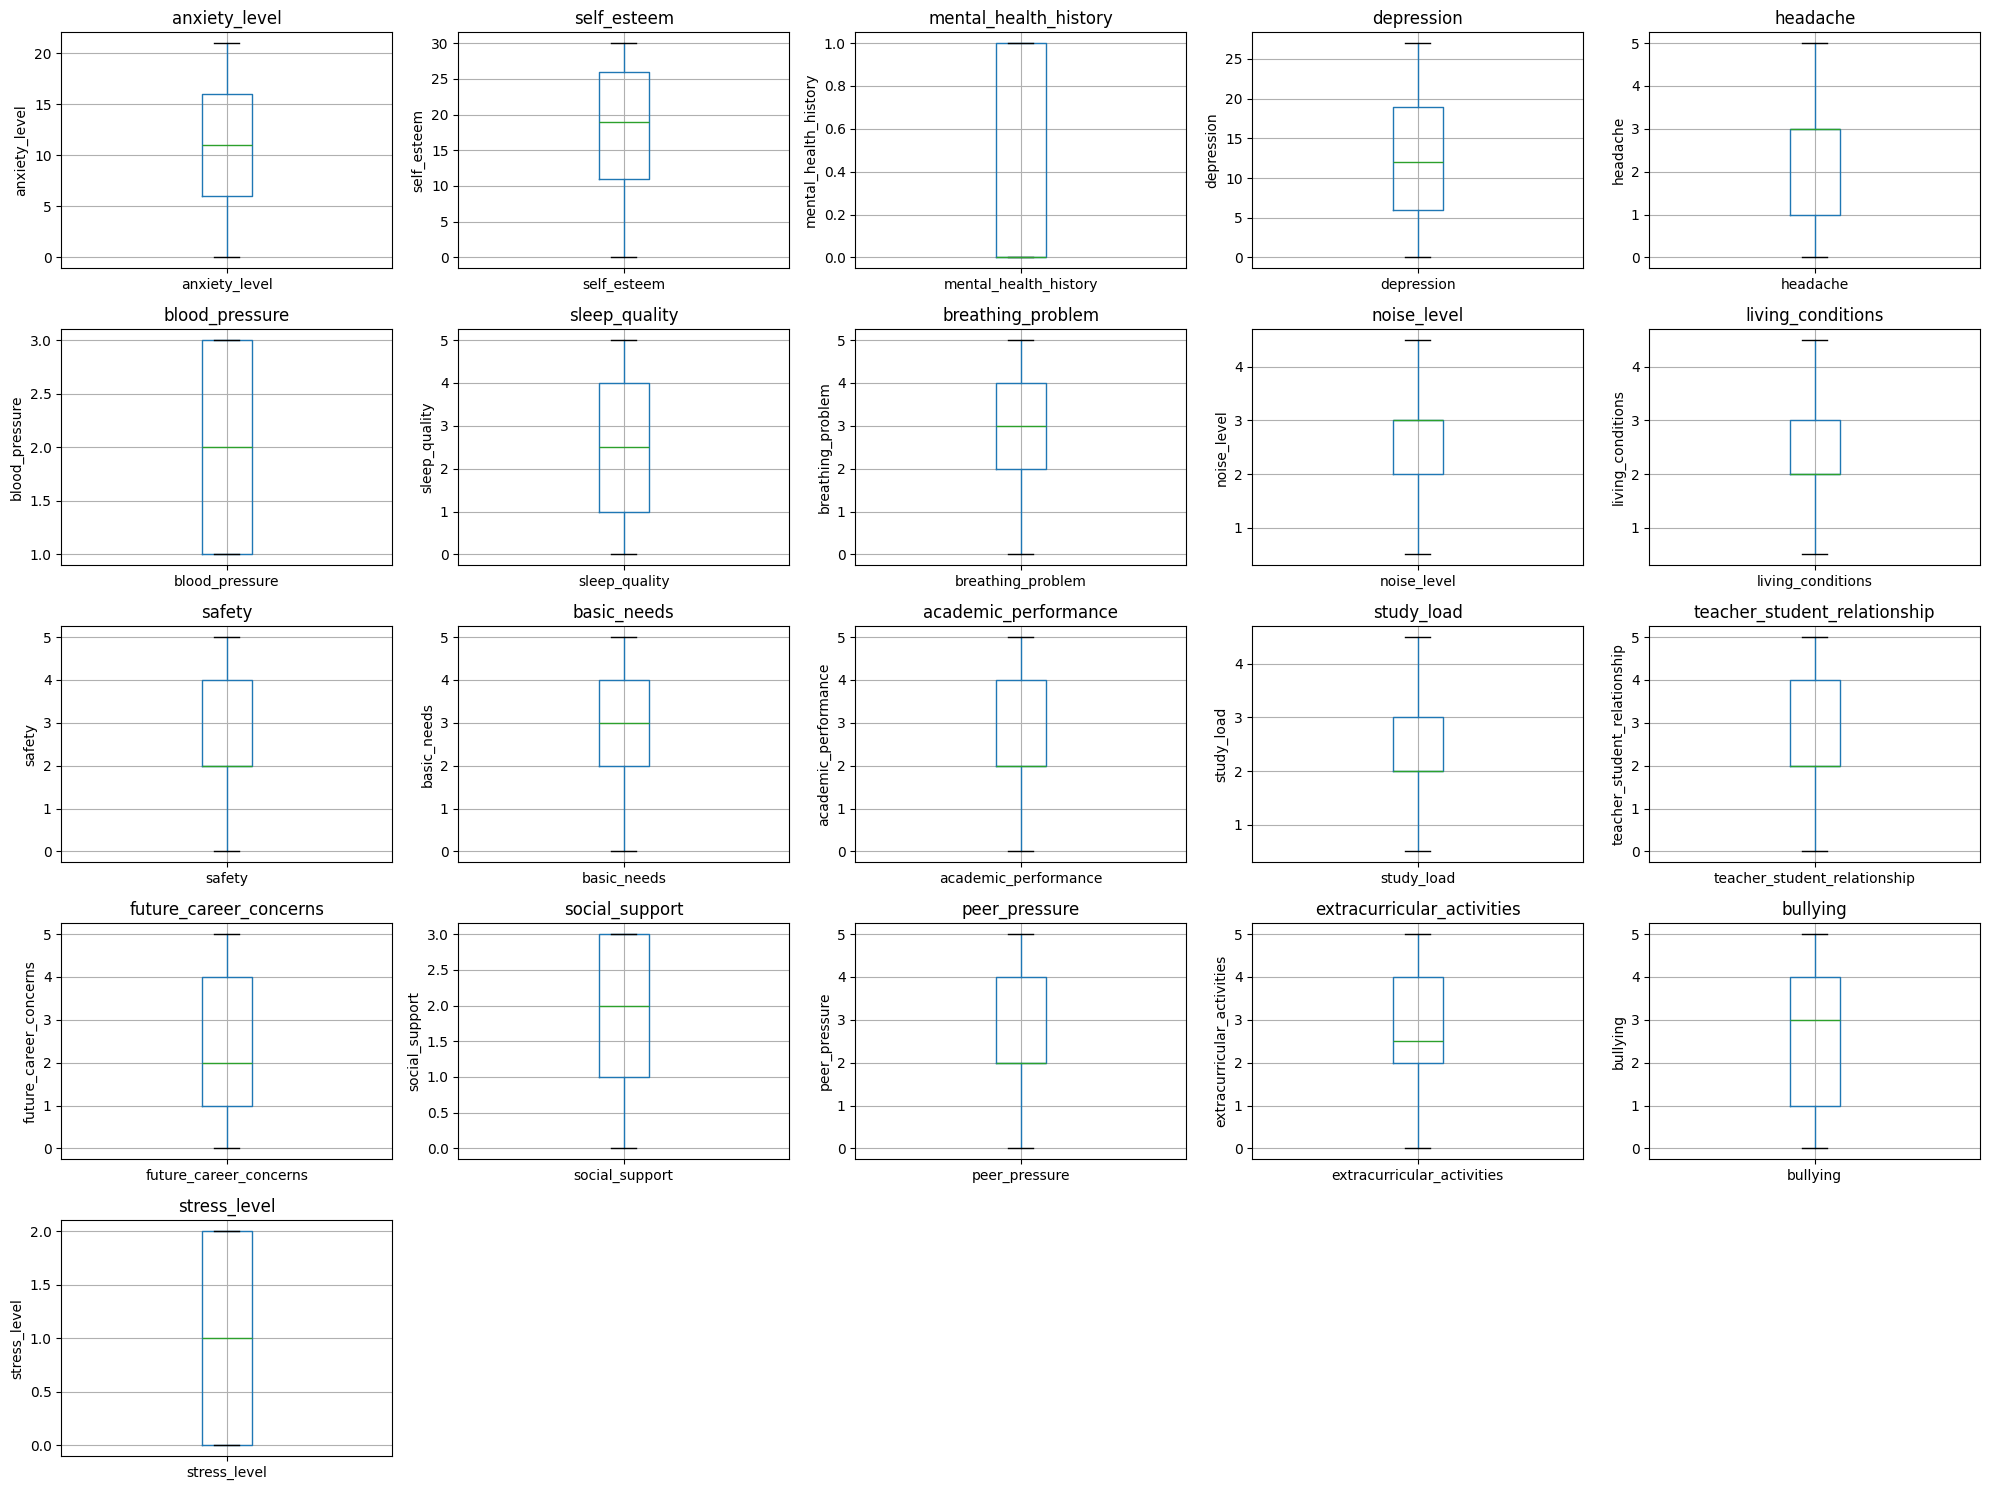

In [17]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [18]:
df.shape

(1100, 21)

**Data Distribution**

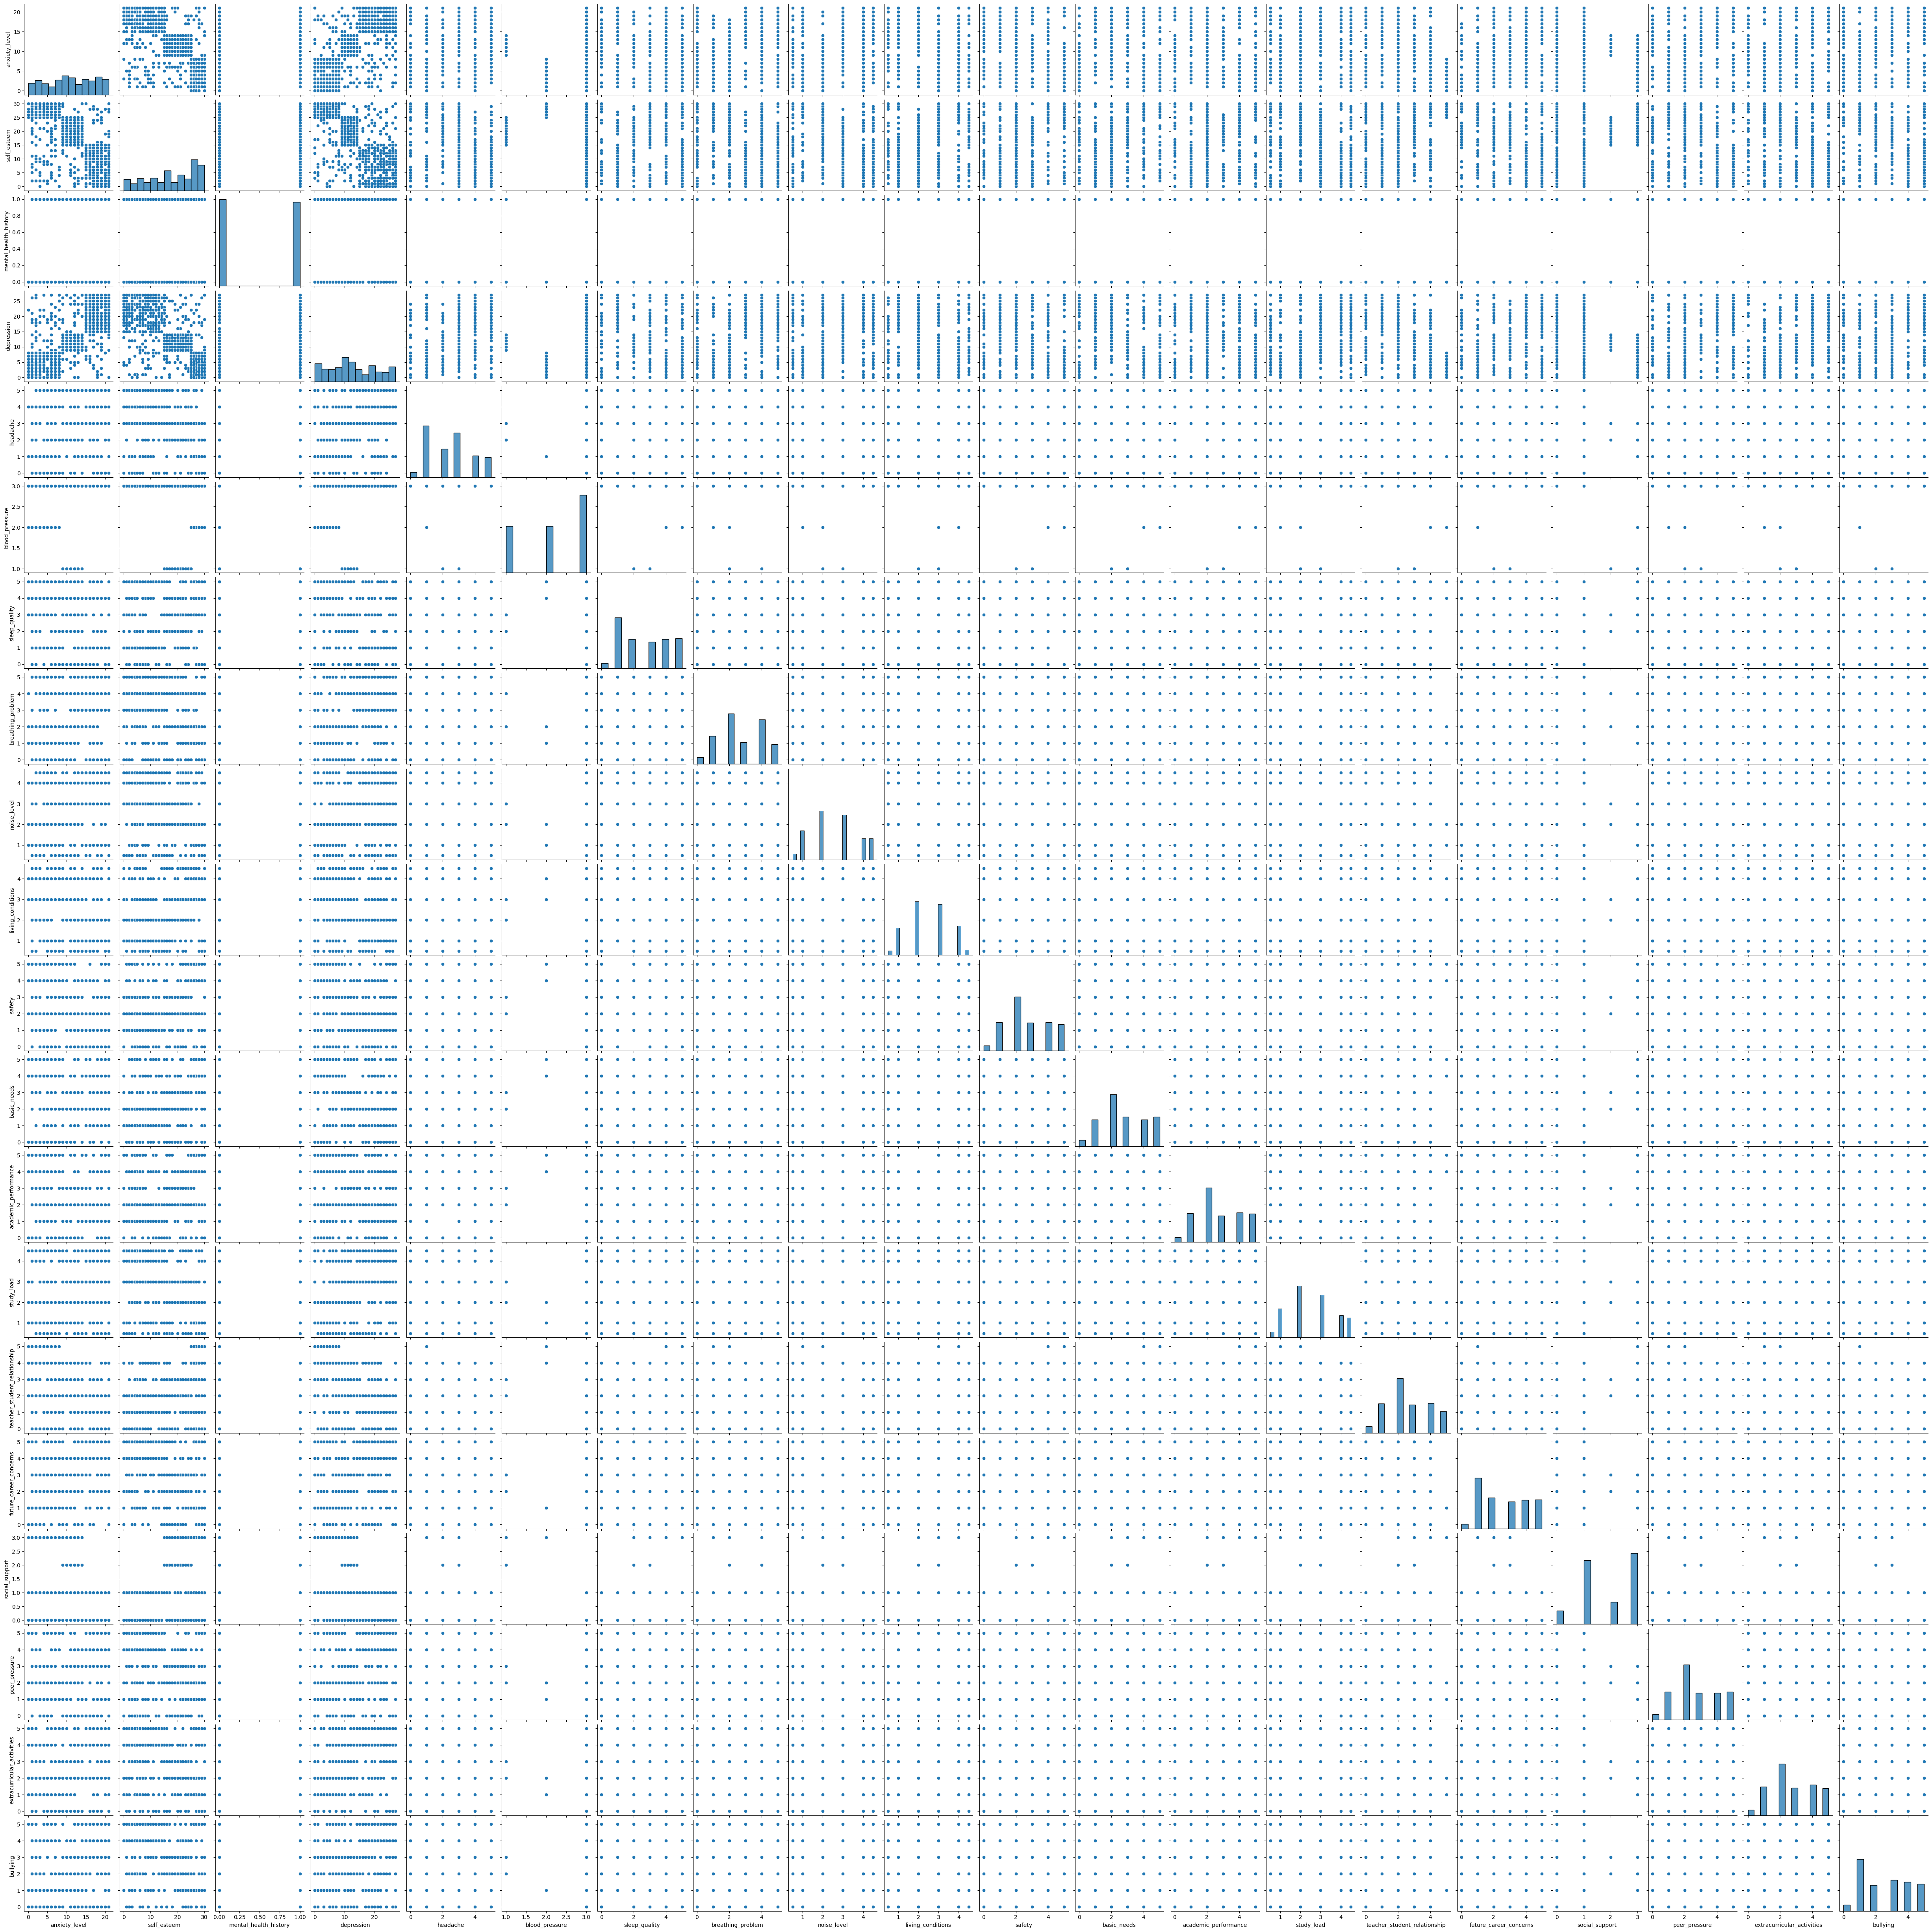

In [21]:
df_attr=(df.drop(['stress_level'],axis=1))
sns.pairplot(df_attr)
plt.show()

**Train-Test Split**

In [22]:
x = df.drop('stress_level', axis=1)     # Drop the target column to get input features
y = df['stress_level']

In [23]:
x.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,14.0,20.0,0.0,11.0,2.0,1.0,2.0,4.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0
1,15.0,8.0,1.0,15.0,5.0,3.0,1.0,4.0,3.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,1.0,4.0,5.0,5.0
2,12.0,18.0,1.0,14.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0
3,16.0,12.0,1.0,15.0,4.0,3.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,4.0,1.0,4.0,4.0,5.0
4,16.0,28.0,0.0,7.0,2.0,3.0,5.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,1.0,5.0,0.0,5.0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Random Forest Model**

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
rfcl = RandomForestClassifier(
    n_estimators=500,   # more trees
    max_depth=None,     # allow trees to grow deep
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",  # force fairness
    random_state=42
)

In [27]:
rfcl.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [28]:
ytrain_predict= rfcl.predict(x_train)
ytest_predict= rfcl.predict(x_test)

**Train Accuracy**

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ytrain_predict))

1.0


Evaluating Model Performance with Confusion Matrix

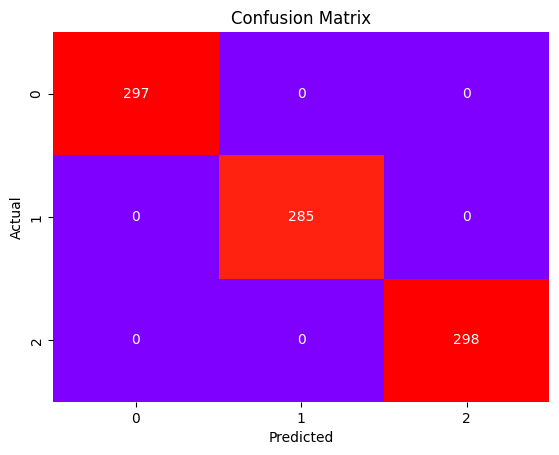

In [31]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='g',cbar=False,cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(y_train, ytrain_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       297
         1.0       1.00      1.00      1.00       285
         2.0       1.00      1.00      1.00       298

    accuracy                           1.00       880
   macro avg       1.00      1.00      1.00       880
weighted avg       1.00      1.00      1.00       880



**Test Accuracy**

In [36]:
print(accuracy_score(y_test, ytest_predict))

0.8545454545454545


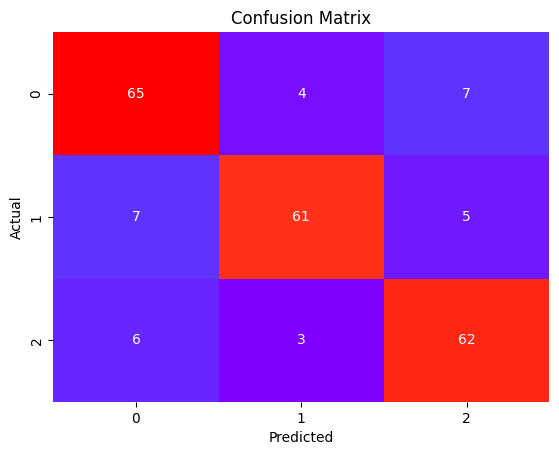

In [37]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='g',cbar=False,cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        76
         1.0       0.90      0.84      0.87        73
         2.0       0.84      0.87      0.86        71

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



**Hyper Parameter Tuning for Overcoming the Overfitting**

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30], # Maximum depth of trees
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required at each leaf node
    'class_weight': ['balanced'] # Keep the class weight
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Use 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=2) # Print progress

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score:  0.898849187001308


After the grid search is complete, we can evaluate the performance of the model with the best parameters on the test set.

Train Accuracy with tuned model:  1.0
Test Accuracy with tuned model:  0.8772727272727273

Classification Report with tuned model:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.87        76
         1.0       0.90      0.86      0.88        73
         2.0       0.90      0.87      0.89        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



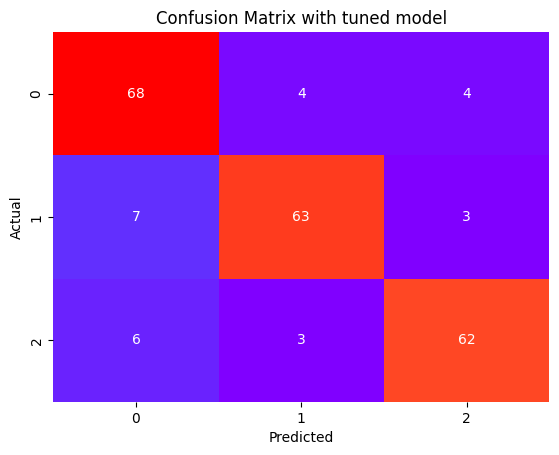

In [40]:
# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
ytrain_predict_tuned = best_rf_model.predict(x_train)
ytest_predict_tuned = best_rf_model.predict(x_test)

print("Train Accuracy with tuned model: ", accuracy_score(y_train, ytrain_predict_tuned))
print("Test Accuracy with tuned model: ", accuracy_score(y_test, ytest_predict_tuned))
print("\nClassification Report with tuned model:\n", classification_report(y_test, ytest_predict_tuned))

sns.heatmap(confusion_matrix(y_test, ytest_predict_tuned), annot=True, fmt='g',cbar=False,cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with tuned model')
plt.show()